<a href="https://colab.research.google.com/github/chikakoto/facial-expression-recognition/blob/rabi/notebooks/rabiuls_notebook/RH_SGDClassifier_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Source 
https://www.kaggle.com/datasets/msambare/fer2013
https://drive.google.com/file/d/168XK2dmyPg9d6AI3cgbxhCXdIow7uVK-/view?usp=sharing 


Regularized linear models with Stochastic Gradient Descent (SGD)

# Importing Library & Downloading Raw data

In [2]:
# Importing basic python Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
%matplotlib inline
from skimage.transform import resize
from skimage.io import imread
from glob import glob
from scipy import ndimage as ndi

from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from skimage.transform import resize

In [2]:
#mounting google drive and navigating to project folder
from google.colab import drive
drive.mount('/content/drive')
# %cd drive/MyDrive/Colab Notebooks/facial-expression-recognition

Mounted at /content/drive


#this section is for FER data set 

In [3]:
#emotion_labels = {0:‘angry’, 2:‘fear’, 3:‘happy’, 4:‘sad’, 5:‘surprise’, 6:‘neutral’}
df = pd.read_csv('/content/sift_data.csv')
print(df.shape)
df.head(2)

(35322, 3)


,usage,emotion,histogram
0,train,3,4 3 6 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,train,3,2 8 4 4 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [5]:
df.columns

Index(['usage', 'emotion', 'histogram'], dtype='object')

In [4]:
np.array(df.pixels[0].split(' ')).astype(float).shape

AttributeError: ignored

In [16]:
df.pixels = df.pixels.apply(lambda x: np.array(df.pixels[0].split(' ')).astype(float) )

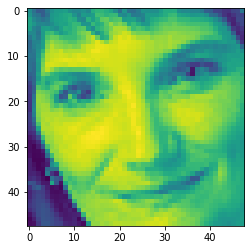

In [18]:
plt.imshow(df.pixels[0].reshape(48,48))

In [19]:
X = np.array(df['pixels'])
y = np.array(df['emotion'])
print(X.shape, y.shape)

(35328,) (35328,)


In [22]:
X = np.stack(X, axis = 0)
X = X.reshape(35328, 48*48)
X.shape

(35328, 2304)

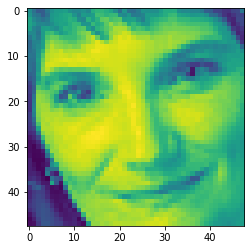

In [23]:
plt.imshow(X[0].reshape(48,48))

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [24]:
# split the dataframe in to train, test and validation data frames
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [28]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [29]:
y_pred = sgd_clf.predict(X_Test)
accuracy_score(y_Test, y_pred)

In [31]:
accuracy_score(y_Test, y_pred)

0.13897537503538068

# this section is for SIFT dat 

In [17]:
#emotion_labels = {0:‘angry’, 2:‘fear’, 3:‘happy’, 4:‘sad’, 5:‘surprise’, 6:‘neutral’}
df_sift = pd.read_csv('/content/sift_data.csv')
print(df_sift.shape)
df_sift.head(2)

(35322, 3)


,usage,emotion,histogram
0,train,3,4 3 6 1 1 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
1,train,3,2 8 4 4 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...


In [11]:
print(df.columns)
print(df.shape)
print(df.emotion.unique())

Index(['usage', 'emotion', 'histogram'], dtype='object')
(35322, 3)
[3 4 2 5 6 0]


In [13]:
print(type(df.emotion[0]), type(df.histogram[0]), len(df.histogram[0]))

<class 'numpy.int64'> <class 'str'> 57


In [14]:
len(df.histogram[0].split(' '))

29

In [10]:
df.emotion.value_counts()

3    8987
6    6195
4    6076
2    5119
0    4945
5    4000
Name: emotion, dtype: int64

In [21]:
#chikako's funciton 
def load_data(df, sift):
    image_data = []
    
    for index, row in df.iterrows():
        if sift == 1:
            field = row.histogram
        else:
            field = row.pixels
        image = np.fromstring(field, dtype=int, sep=' ')
        #scale = np.fromstring(row.scaled_pixels, dtype=int, sep=' ')
        #image = np.reshape(image, (48, 48))
        image_data.append(image)
        #image_scaled.append(scale)
        
    return image_data

In [25]:
df_train = df_sift[df_sift['usage']=='train']
df_test = df_sift[df_sift['usage']=='test']
train_data = load_data(df_train, 1)
train_target = list(df_train.emotion)
test_data = load_data(df_test, 1)
test_target = list(df_test.emotion)

In [26]:
X_train = np.array(train_data)
y_train = np.array(train_target)
X_test = np.array(test_data)
y_test = np.array(test_target)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28257, 29)
(28257,)
(7065, 29)
(7065,)


In [29]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

In [30]:
svm = SVC(C=5, random_state=1, kernel='rbf', gamma=0.01)
svm.fit(X_train, y_train)
y_pred2 = svm.predict(X_test)
print('Test Accuracy: %.3f' % svm.score(X_test, y_test))
y_test2 = y_test

Test Accuracy: 0.251


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)

In [ ]:
y_pred = sgd_clf.predict(X_Test)
accuracy_score(y_Test, y_pred)

# Basic Data preprocessing

In [ ]:
# Data files directory
train_dir = '/content/train'
test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

In [ ]:
def import_data(dir):
  '''this funciton will be used to extract image data into 2 list,
  1st list labels will contain labels information and 
  2nd list images will contain flaten pixels of each image.
  - image data is already reshed into 48,48 numpy array'''

  data=[]
  for directory in sorted(glob(dir+'/*')):
    image_files = glob(directory + '/*.jpg')
    label = directory.split('/')[-1]
    for image_file in image_files:
      image = resize(imread(image_file), (48,48))
      data.append(( label, image))
  return data

In [ ]:
def import_data(dir_loc):
  '''this funciton will be used to extract image data into 3 list, list file will contain file name
  list labels will contain labels information and list images will contain flaten pixels of each image'''
  data=[]
  # train_files = []
  # train_labels = []
  # train_images = []
  for dirname, dirs, filenames in os.walk(dir_loc, topdown=True):
      cat = dirname.replace(dir_loc, '')
      if cat != '':
          cat = cat.replace('/', '')
          for filename in filenames:
              file = os.path.join(dirname, filename)
              image = mpimg.imread(file).flatten()
              data.append((file, cat, image))
              # train_files.append(file)
              # train_images.append(image)
              # train_labels.append(cat)
  return data

In [ ]:
#processing data and saving it in list 
# train_file, train_label, train_image = import_data(train_dir)
# print('length of each traning list: ', len(train_file), len(train_label), len(train_image))

#or create a DF 

df_train = pd.DataFrame(data = import_data(train_dir), 
                  columns = ['label','image'])
print(df_train.shape)
df_train.head(2)

(28709, 2)


,label,image
0,angry,"[[0.8235294117647012, 0.5960784313725466, 0.42..."
1,angry,"[[0.2627450980392157, 0.3098039215686276, 0.34..."


In [ ]:
df_train.label.unique()
#emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
df_train.label = df_train.label.apply(lambda x: emotions[x])
df_train.label.unique()

array([0, 1, 2, 3, 6, 4, 5])

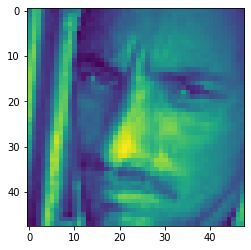

In [ ]:
#visualizing sample image
plt.imshow(df_train['image'][100])

In [ ]:
#checking forn null nalue 
df_train.image.isnull().sum()

0

#imbalance data 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline

from collections import Counter

In [ ]:
import copy 
df_imb = copy.copy(df_train)
# df_imb.image = df_imb.image.apply(lambda x: x.flatten())

In [ ]:
df_imb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   28709 non-null  int64 
 1   image   28709 non-null  object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [ ]:
img_array = df_imb.image

In [ ]:
X = np.stack(img_array, axis = 0)
X = X.reshape(28709, 48,48)
X.shape

(28709, 48, 48)

In [ ]:
y = np.array(list(map(int, df_imb['label'])))

In [ ]:
y


array([0, 0, 0, ..., 5, 5, 5])

In [ ]:
df_imb.columns

Index(['label', 'image'], dtype='object')

In [ ]:
# pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
pp = Pipeline([('tk',TomekLinks()),('ros',RandomOverSampler(random_state=0))])
train_image_array, train_image_label = pp.fit_resample(X.reshape(X.shape[0],48*48), y)
print(Counter(train_image_label))
train_image_array = train_image_array.reshape(train_image_array.shape[0], 48, 48)

Counter({0: 7025, 1: 7025, 2: 7025, 3: 7025, 6: 7025, 4: 7025, 5: 7025})


In [ ]:
train_image_label

array([0, 0, 0, ..., 6, 6, 6])

In [ ]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')

In [ ]:
train_images.shape

(49175, 48, 48, 1)

In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
def sample_plot(x,y=None):
    #x, y are numpy arrays
    n = 20
    samples = random.sample(range(x.shape[0]),n)
    
    fig, axs = plt.subplots(2,10, figsize=(25,5), sharex=True, sharey=True)
    ax = axs.ravel()
    for i in range(n):
        ax[i].imshow(x[samples[i],:,:], cmap=plt.get_cmap('gray'))
        ax[i].set_xticks([])
        ax[i].set_yticks([])
        if y is not None:
            ax[i].set_title(emotions_labelss[y[samples[i]]])

In [ ]:
emotions_labelss = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

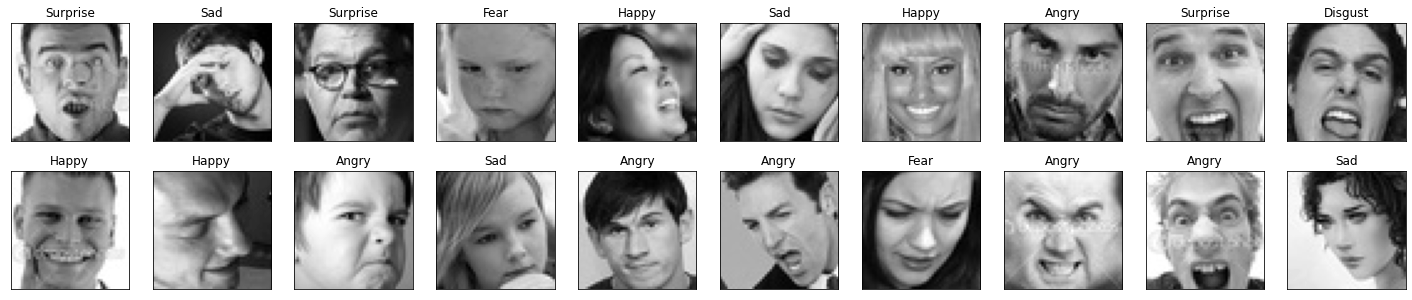

In [ ]:
import random
sample_plot(train_image_array, train_image_label)

In [ ]:
train_image_array[0]

In [ ]:
df_imb.head(2)

,label,image
0,0,"[0.8235294117647012, 0.5960784313725466, 0.427..."
1,0,"[0.2627450980392157, 0.3098039215686276, 0.345..."


In [ ]:
# pp = Pipeline([('rus',RandomUnderSampler(random_state=0, replacement=False))])
pp = Pipeline([('tk',TomekLinks()),('ros',RandomOverSampler(random_state=0))])
train_image_array, train_image_label = pp.fit_resample(train_image_array1.reshape(train_image_array1.shape[0],48*48), train_image_label1)
print(Counter(train_image_label))
train_image_array = train_image_array.reshape(train_image_array.shape[0], 48, 48)

# Image Augmention

In [ ]:
import copy 
df_copy = copy.copy(df_train)
col = df_copy.columns
print(col)

Index(['label', 'image'], dtype='object')


In [ ]:
df_copy['image'][0].shape

(48, 48)

In [ ]:
#horiontal flip
df_copy['image'] = df_copy['image'].apply(lambda x: (np.flip(x, axis=1)).reshape(48,48))

In [ ]:
df_copy['image'][0].shape

(48, 48)

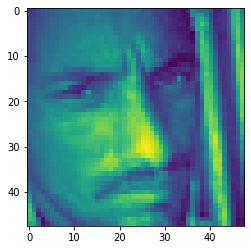

In [ ]:
plt.imshow(df_copy['image'][100]) #fliped image 

In [ ]:
#combined both df
# df_aug =  pd.concat([df_train, df_copy], axis=0)
df_aug = np.concatenate((df_train, df_copy))
print(df_aug.shape)
# df_aug.head(1)

(57418, 2)


# Affine transformation

In [ ]:
df_t = copy.copy(df_train)
df_t.head(2)

,label,image
0,0,"[[0.8235294117647012, 0.5960784313725466, 0.42..."
1,0,"[[0.2627450980392157, 0.3098039215686276, 0.34..."


In [ ]:
w, h = df_t.image[0].shape
print(w, h )

48 48


In [ ]:
#Apply identity transform:
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
#Apply identity transform:
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
#Scale the image (0.75 times along the x axis and 1.25 times along the y axis):
s_x, s_y = 0.75, 1.25
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
#Rotate the image by 30° counter-clockwise. It's a composite operation—first, you will need to shift/center the image, 
#apply rotation, and then apply inverse shift:
theta = np.pi/6
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ np.array([[np.cos(theta),
                                                                  np.sin(theta),0],
                                                                 [np.sin(theta),-np.cos(theta),0],
                                                                 [0,0,1]]) @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])

#Apply shear transform to the image:
lambda1 = 0.5
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])

In [ ]:
#image before transformation 
plt.imshow(df_t['image'][100])

NameError: ignored

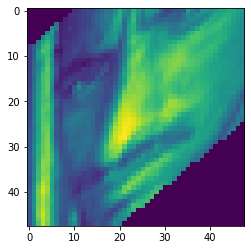

In [ ]:
#App.y transformation to the image 
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
df_t['image'] = df_t['image'].apply(lambda x: ndi.affine_transform(x, mat_all))
plt.imshow(df_t['image'][100])


In [ ]:
print ('shape of augmented dataframe: ',df_aug[0, 1].shape)
print ('shape of augmented dataframe: ',df_t['image'][0].shape)

shape of augmented dataframe:  (48, 48)
shape of augmented dataframe:  (48, 48)


In [ ]:
df_aug[0, 1].shape

(48, 48)

In [ ]:
# Combined both Augmentd DF and New trasformed DF 
#combined both DF
# df_final =  pd.concat([df_aug, df_t], axis=0)
df_final = np.concatenate((df_aug, df_t))
print(df_final.shape)

(86127, 2)


In [ ]:
#shape of individual image 
df_final[0, 1].shape

(48, 48)

In [ ]:
X = df_final[:, 1]
y = df_final[:, 0]

In [ ]:
X.shape, y.shape

((86127,), (86127,))

In [ ]:
X = np.stack(X, axis = 0)
X = X.reshape(86127, 2304)
print(X.shape, y.shape)

(86127, 2304) (86127,)


In [ ]:
y = to_categorical(y)
y.shape

(86127, 7)

In [ ]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print('validation data shape: ',X_val.shape, y_val.shape)
print('Testing data shape: ',X_Test.shape, y_Test.shape)
print('Training data shape: ',X_train.shape, y_train.shape)

validation data shape:  (4306, 2304) (4306, 7)
Testing data shape:  (4307, 2304) (4307, 7)
Training data shape:  (77514, 2304) (77514, 7)


# DATA NORMALIZATION

In [ ]:
# image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

#RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold


In [ ]:
# Use 28 random trees
model = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=101)

In [ ]:
%cd drive/MyDrive/Colab Notebooks/facial-expression-recognition/model

/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/model


In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/model'

In [ ]:
import pickle
# /content/drive/MyDrive/Colab Notebooks/facial-expression-recognition/model
# save the model to disk
filename = 'rf_finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
model_pred = model.predict(X_Test)

In [ ]:
accuracy_score(model_pred,y_Test)


0.0

In [ ]:
print(classification_report(model_pred,y_Test))

              precision    recall  f1-score   support

           0       0.07      1.00      0.13        40
           1       0.17      1.00      0.29        11
           2       0.10      0.90      0.19        71
           3       0.18      0.87      0.30       230
           4       0.03      0.76      0.07        33
           5       0.32      0.93      0.48       162
           6       0.05      0.93      0.10        43

   micro avg       0.12      0.90      0.22       590
   macro avg       0.13      0.91      0.22       590
weighted avg       0.19      0.90      0.30       590
 samples avg       0.12      0.12      0.12       590



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Retry Random Forest

In [ ]:
#(49175, 48, 48, 1)

In [ ]:
train_image_array, train_image_label

In [ ]:
y = to_categorical(train_image_label)
y.shape

(49175, 7)

In [ ]:
X = train_image_array.reshape(49175, 48*48)
print(X.shape, y.shape)

(49175, 2304) (49175, 7)


In [ ]:
# split the dataframe in to train, test and validation data frames

from sklearn.model_selection import train_test_split
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [ ]:
print('validation data shape: ',X_val.shape, y_val.shape)
print('Testing data shape: ',X_Test.shape, y_Test.shape)
print('Training data shape: ',X_train.shape, y_train.shape)

validation data shape:  (2459, 2304) (2459, 7)
Testing data shape:  (2459, 2304) (2459, 7)
Training data shape:  (44257, 2304) (44257, 7)


In [ ]:
# image pre-processing

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [ ]:
# Use 50 random trees
model = RandomForestClassifier(n_estimators=50,max_features='auto',random_state=101, n_jobs=-1)

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=101)

In [ ]:
model_pred = model.predict(X_Test)

In [ ]:
accuracy_score(model_pred,y_Test)

0.0

# Test groud



In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [ ]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    # Fit Model
    model.fit(X_train,y_train)
    
    # Get Metrics
    
    preds = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    print(f'RMSE : {rmse}')
    
    # Plot results
    signal_range = np.arange(0,100)
    output = model.predict(signal_range.reshape(-1,1))
    
    
    plt.figure(figsize=(12,6),dpi=150)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')
    plt.plot(signal_range,output)

In [ ]:
# http://www.vision.caltech.edu/Image_Datasets/Caltech101/
# https://www.kaggle.com/manikg/training-svm-classifier-with-hog-features
%matplotlib inline
import numpy as np
from skimage.io import imread
from skimage.color import gray2rgb
from skimage.transform import resize
from skimage.feature import hog
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from glob import glob
from matplotlib import pyplot as plt

In [ ]:
images, hog_images = [], []
X, y = [], []
ppc = 8
sz = 48
for dir in sorted(glob('/content/train/*')):
    image_files = glob(dir + '/*.jpg')
    label = dir.split('/')[-1]
    print(label, len(image_files))
    for image_file in image_files:
        image = resize(imread(image_file), (sz,sz))
        if len(image.shape) == 2: # if a gray-scale image
            image = gray2rgb(image)
        fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True, multichannel=True)
        images.append(image)
        hog_images.append(hog_image)
        X.append(fd)
        y.append(label)
    

angry 3995
disgust 436
fear 4097
happy 7215
neutral 4965
sad 4830
surprise 3171


In [ ]:
print(len(images), hog_images[0].shape, X[0].shape, X[1].shape, len(y))

3995 (48, 48) (1152,) (1152,) 3995


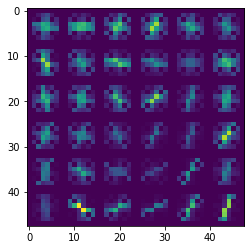

In [ ]:
plt.imshow(hog_images[0])

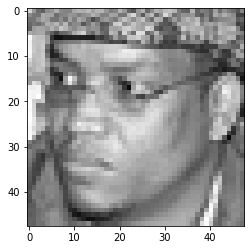

In [ ]:
plt.imshow(images[0])

In [ ]:
X = np.array(X)
y = np.array(y)
indices = np.arange(len(X))
X_train, X_test, y_train, y_test, id_train, id_test = train_test_split(X, y, indices, test_size=0.1, random_state=1)

In [ ]:
clf = LogisticRegression(C=1000, random_state=0, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train, y_train)

ValueError: ignored

In [ ]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()

image.shape

(512, 512, 3)

In [ ]:
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [ ]:
features = []
for x in range(0, train_image[0].shape[0]): 
    features.append('feature '+ str(x))

In [ ]:
# Make dataframe 
df_train = pd.DataFrame(data = train_images_clean, 
                  columns = features).astype('uint8')
df_train.head(2)

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2294,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303
0,42,43,57,59,50,50,52,54,51,55,...,43,33,43,48,49,59,117,161,173,181
1,125,126,128,119,112,168,177,170,173,174,...,146,131,107,84,77,73,59,106,200,208


In [ ]:
df = pd.DataFrame(data = train_label, 
                  columns = ['emotion'])
df_train = df_train.join(df)

df_train.head(2)

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,42,43,57,59,50,50,52,54,51,55,...,33,43,48,49,59,117,161,173,181,disgust
1,125,126,128,119,112,168,177,170,173,174,...,131,107,84,77,73,59,106,200,208,disgust


In [ ]:
df_train.to_csv('train.csv',index=False)

#start data processing from CSV file 

In [ ]:
#create a dataframe using the data csv
df = pd.read_csv('/content/train.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['feature 0', 'feature 1', 'feature 2', 'feature 3', 'feature 4',
       'feature 5', 'feature 6', 'feature 7', 'feature 8', 'feature 9',
       ...
       'feature 2295', 'feature 2296', 'feature 2297', 'feature 2298',
       'feature 2299', 'feature 2300', 'feature 2301', 'feature 2302',
       'feature 2303', 'emotion'],
      dtype='object', length=2305)
(28698, 2305)


,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 2295,feature 2296,feature 2297,feature 2298,feature 2299,feature 2300,feature 2301,feature 2302,feature 2303,emotion
0,42,43,57,59,50,50,52,54,51,55,...,33,43,48,49,59,117,161,173,181,disgust
1,125,126,128,119,112,168,177,170,173,174,...,131,107,84,77,73,59,106,200,208,disgust


In [ ]:
plt.imshow(np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48))

In [ ]:
fig = plt.figure(1,(14,14))
x = 0

for label in sorted(df.emotion.unique()):
  for i in range(3):
    img = df[df.emotion == label].pixels.iloc[x]
    img = img.reshape(48,48)
    x +=1

    ax = plt.subplot(7,7,x)
    ax.imshow(img)
    ax.set_title(emotions_label_text[label])
    plt.tight_layout()

In [ ]:
#create a dataframe using the data csv
df = pd.read_csv('/content/data.csv')
print(df.columns)
print(df.shape)
df.head(2)

Index(['Unnamed: 0', 'file', 'emotion', 'pixels'], dtype='object')
(7178, 4)


,Unnamed: 0,file,emotion,pixels
0,0,PrivateTest_45699463.jpg,3,5 4 5 9 10 9 10 12 8 14 13 17 24 26 36 48 67 7...
1,1,PrivateTest_61855708.jpg,3,19 21 22 18 20 21 16 18 19 18 20 23 23 14 16 1...


In [ ]:
df.drop(columns='Unnamed: 0', inplace=True)
print(df.columns)
df.head(2)

Index(['file', 'emotion', 'pixels'], dtype='object')


,file,emotion,pixels
0,PrivateTest_45699463.jpg,3,5 4 5 9 10 9 10 12 8 14 13 17 24 26 36 48 67 7...
1,PrivateTest_61855708.jpg,3,19 21 22 18 20 21 16 18 19 18 20 23 23 14 16 1...


In [ ]:
df.tail()

NameError: ignored

In [ ]:
np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48)

array([[ 5.,  4.,  5., ..., 12.,  3.,  8.],
       [ 3.,  5.,  7., ..., 10.,  8.,  8.],
       [ 2.,  6.,  8., ...,  3.,  8.,  5.],
       ...,
       [ 8.,  8., 10., ..., 13., 16., 13.],
       [11.,  7.,  8., ..., 19., 16.,  8.],
       [15.,  7., 10., ..., 17., 13., 11.]], dtype=float32)

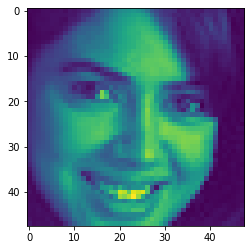

In [ ]:
plt.imshow(np.array(df.pixels[0].split(' ')).astype('float32').reshape(48,48))

In [ ]:
df['pixels']= df['pixels'].apply(lambda x: np.array(x.split(' ')).astype('float32').reshape(48,48))

In [ ]:
df['pixels'][0].shape

(48, 48)

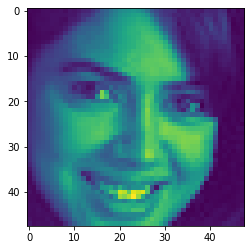

In [ ]:
plt.imshow(df['pixels'][0])

In [ ]:
df.head()

,file,emotion,pixels
0,PrivateTest_45699463.jpg,3,"[[5.0, 4.0, 5.0, 9.0, 10.0, 9.0, 10.0, 12.0, 8..."
1,PrivateTest_61855708.jpg,3,"[[19.0, 21.0, 22.0, 18.0, 20.0, 21.0, 16.0, 18..."
2,PublicTest_53681781.jpg,3,"[[228.0, 229.0, 230.0, 229.0, 228.0, 227.0, 22..."
3,PrivateTest_52109800.jpg,3,"[[25.0, 33.0, 43.0, 30.0, 46.0, 84.0, 105.0, 1..."
4,PublicTest_41104919.jpg,3,"[[33.0, 29.0, 15.0, 15.0, 20.0, 36.0, 40.0, 54..."


In [ ]:
# df['lables'] = df.file.apply(lambda x: x.split('_')[0])
df['lables'] = df.file.apply(lambda x: 1 if 'Test' in x else 0)
df['lables'].value_counts()

1    7178
Name: lables, dtype: int64

In [ ]:
# pip install opencv-python==3.4.3.18
import cv2

In [ ]:
gray = df['pixels'][0]

In [ ]:
gray.shape

(48, 48)

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

error: ignored

In [ ]:
# import numpy as np
# import cv2

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

     |████████████████████████████████| 25.0 MB 64.8 MB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

error: ignored

In [ ]:
from google.colab.patches import cv2

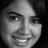

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(gray)

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = sorted(df.emotion.value_counts().index), y = df.emotion.value_counts())

In [ ]:
from skimage.io import imread
import numpy as np
import matplotlib.image as img
import pandas as pd

emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
train_data = []
train_dir = '/content/train'
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          # obj = imread(os.path.join(dirname, filename)).flatten()
          print(type(obj), len(obj), obj.shape)
          #train_data.append((emotions[cat], obj, file))
          train_data.append((1,obj))
          break


<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)


In [ ]:
df = pd.DataFrame(train_data)
df.shape

(7, 2)

In [ ]:
df.head(1)

,0,1
0,1,"[255, 254, 255, 232, 115, 102, 80, 62, 50, 53,..."


In [ ]:
len(df[1][0])

2304

In [ ]:
df.to_csv('gfgfile.csv',
              header = ['l','p'],
              index = None)

In [ ]:
df.to_csv('gfgfile.csv',
              header = None,
              index = None)

In [ ]:
df1 = pd.read_csv('/content/text')

In [ ]:
len(df1.head(1).split(' '))

AttributeError: ignored

In [ ]:
from skimage.io import imread
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
train_data = []
train_dir = '/content/train'
for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          # obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          obj = imread(os.path.join(dirname, filename)).flatten()
          print(type(obj), len(obj), obj.shape)
          train_data.append((emotions[cat], obj, file))
          break


<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)
<class 'numpy.ndarray'> 2304 (2304,)


In [ ]:
train_data[0]

(5,
 array([255, 254, 255, ..., 127, 179, 191], dtype=uint8),
 '/content/train/surprise/Training_98972491.jpg')

In [ ]:
for x,y,z in train_data:
  print(len(y))
  print(len(str(y)))


2304
29
2304
29
2304
29
2304
29
2304
29
2304
29
2304
23


In [ ]:
df1 = pd.read_csv('/content/a_file.txt')
df1.head()

,(5,array([255,254,255,...,127,179,191],dtype=uint8),'/content/train/surprise/Training_98972491.jpg')
0,(6,array([201,201,203,...,97,92,91],dtype=uint8),'/content/train/neutral/Training_9443885.jpg')
1,(2,array([111,127,155,...,236,230,213],dtype=uint8),'/content/train/fear/Training_77272441.jpg')
2,(1,array([ 59,40,59,...,165,163,163],dtype=uint8),'/content/train/disgust/Training_33936842.jpg')
3,(0,array([150,171,199,...,101,103,101],dtype=uint8),'/content/train/angry/Training_58517344.jpg')
4,(4,array([147,151,144,...,0,1,0],dtype=uint8),'/content/train/sad/Training_7410773.jpg')


In [ ]:
df1[1]

KeyError: ignored

In [ ]:
a_list = ["abc", "def", "ghi"]
textfile = open("a_file.txt", "w")
for element in a_list:
    textfile.write(element + "\n")
textfile.close()

In [ ]:
type(train_data[0])

list

In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
df.head(2)

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...


In [ ]:
print('len of trian data list:', len(train_data),len(train_label))
print('len of one pixel:', len(train_data[0]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(list(zip(train_label, train_data)),
               columns =['emotion','pixels'])

df.to_csv('file_name1.txt', index=None, sep='\t', mode='a')
df1 = pd.read_csv('/content/file_name1.txt')
print(len(df1.pixels[0]))
df1.head()

len of trian data list: 7 0
len of one pixel: 2304
29


,emotion,pixels,dir
0,5,[255 254 255 ... 127 179 191],/content/train/surprise/Training_98972491.jpg
1,6,[201 201 203 ... 97 92 91],/content/train/neutral/Training_9443885.jpg
2,2,[111 127 155 ... 236 230 213],/content/train/fear/Training_77272441.jpg
3,1,[ 59 40 59 ... 165 163 163],/content/train/disgust/Training_33936842.jpg
4,0,[150 171 199 ... 101 103 101],/content/train/angry/Training_58517344.jpg


In [ ]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 7
len of one pixel: 2304


In [ ]:
df.to_csv('file_name1.txt', index=None, sep='\t', mode='a')
df1 = pd.read_csv('/content/file_name1.txt')
print(len(df1.pixels[0]))
df1.head()

29


,emotion,pixels,dir
0,5,[255 254 255 ... 127 179 191],/content/train/surprise/Training_98972491.jpg
1,6,[201 201 203 ... 97 92 91],/content/train/neutral/Training_9443885.jpg
2,2,[111 127 155 ... 236 230 213],/content/train/fear/Training_77272441.jpg
3,1,[ 59 40 59 ... 165 163 163],/content/train/disgust/Training_33936842.jpg
4,0,[150 171 199 ... 101 103 101],/content/train/angry/Training_58517344.jpg


In [ ]:
len(df1.pixels[0])

29

In [ ]:
#Extracting the data and saving it into list
#need to improve code with how we are extracting "cat"
from zipfile import ZipFile
import matplotlib.image as mpimg
import os
train_data = []
train_dir = '/content/train'
# test_dir = '/content/test'
emotions = {'angry':0, 'disgust':1, 'fear':2, 'happy':3, 'sad':4, 'surprise':5, 'neutral':6}
with ZipFile('/content/archive.zip', 'r') as f:
  f.extractall()

for dirname, dirs, filenames in os.walk(train_dir, topdown=True):
    cat = dirname.replace(train_dir, '')
    if cat != '':
        cat = cat.replace('/', '')
        for filename in filenames:
          file = os.path.join(dirname, filename)
          obj = mpimg.imread(os.path.join(dirname, filename)).flatten()
          train_data.append((emotions[cat], obj, file))

In [ ]:
print('len of trian data list:', len(train_data))
print('len of one pixel:', len(train_data[1][1]))
import pandas as pd
#converting out test data into a Dataframe 
df = pd.DataFrame(train_data, columns = ['emotion','pixels','dir'])

len of trian data list: 7
len of one pixel: 2304


In [ ]:
print('shape of the traning dataframe: ', df.shape)
print('data type of the pixel: ', type(df.pixels[0]))

shape of the traning dataframe:  (7, 3)
data type of the pixel:  <class 'numpy.ndarray'>


In [ ]:
df.head(2)

,emotion,pixels,dir
0,5,"[255, 254, 255, 232, 115, 102, 80, 62, 50, 53,...",/content/train/surprise/Training_98972491.jpg
1,6,"[201, 201, 203, 198, 202, 207, 215, 212, 217, ...",/content/train/neutral/Training_9443885.jpg


In [ ]:
df.pixels[0]
print(len(df.pixels[0]))

2304


In [ ]:
train_img = df.pixels.apply(lambda x: x.reshape(48,48,1))

In [ ]:
df['pixels']

0    [255, 254, 255, 232, 115, 102, 80, 62, 50, 53,...
1    [201, 201, 203, 198, 202, 207, 215, 212, 217, ...
2    [111, 127, 155, 180, 189, 197, 191, 131, 75, 8...
3    [59, 40, 59, 63, 29, 26, 30, 24, 35, 64, 86, 9...
4    [150, 171, 199, 201, 138, 31, 49, 65, 77, 88, ...
5    [147, 151, 144, 153, 154, 155, 164, 164, 164, ...
6    [59, 60, 39, 27, 24, 51, 26, 10, 23, 20, 21, 3...
Name: pixels, dtype: object

In [ ]:
df.pixels[0].reshape(48,48)

array([[248, 247, 173, ..., 158, 160, 168],
       [253, 249, 186, ..., 159, 163, 161],
       [254, 254, 184, ..., 153, 157, 172],
       ...,
       [ 36,  42,  92, ...,   2,   0,   0],
       [ 42,  72, 139, ...,   0,   0,   1],
       [ 50, 127, 137, ...,   1,   1,   0]], dtype=uint8)

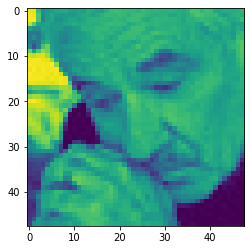

In [ ]:
#lets look at one image 
plt.imshow(df.pixels[0].reshape(48,48))

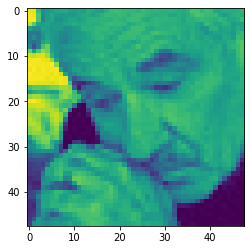

In [ ]:
#view an imapge directly from image file 
plt.imshow(mpimg.imread(df.dir[0]))

In [ ]:
emotions_label_text = {0:'angry', 1:'disgust', 2:'fear', 3:'happy', 4:'sad', 5:'surprise', 6:'neutral'}

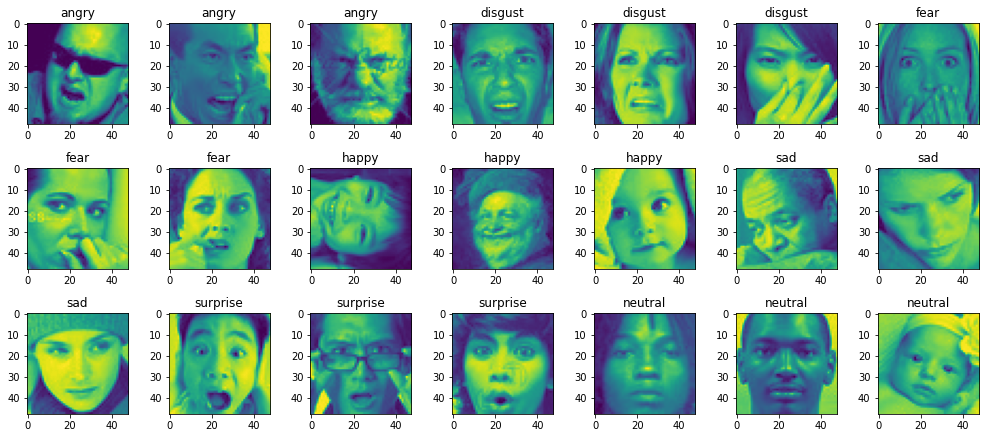

In [ ]:
fig = plt.figure(1,(14,14))
x = 0

for label in sorted(df.emotion.unique()):
  for i in range(3):
    img = df[df.emotion == label].pixels.iloc[x]
    img = img.reshape(48,48)
    x +=1

    ax = plt.subplot(7,7,x)
    ax.imshow(img)
    ax.set_title(emotions_label_text[label])
    plt.tight_layout()

# Importing Library


## Importing Basic Python Library

# Data & data visualization

## Importing Data

## Viz

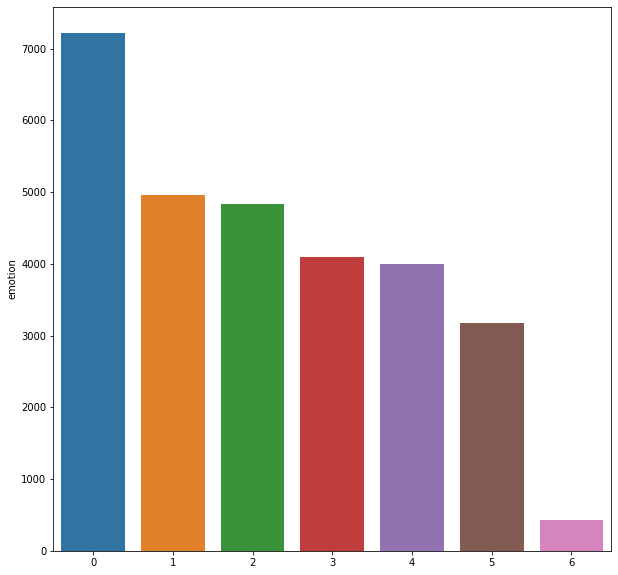

In [ ]:
plt.figure(figsize = (10,10))
sns.barplot(x = sorted(df.emotion.value_counts().index), y = df.emotion.value_counts())

In [ ]:
train_img = df.pixels.apply(lambda x: x.reshape(48,48,1))

In [ ]:
X = np.stack(train_img, axis=0)
y = df.emotion.values

In [ ]:
print('shape of our image array: ', X.shape)
print('shape of our labels array: ', y.shape)
# plt.imshow(X[0])
# plt.title(emotions_label_text[y[0]])

shape of our image array:  (28709, 48, 48, 1)
shape of our labels array:  (28709,)


In [ ]:
print(X[0].shape)
X[0]

(48, 48, 1)


array([[[248],
        [247],
        [173],
        ...,
        [158],
        [160],
        [168]],

       [[253],
        [249],
        [186],
        ...,
        [159],
        [163],
        [161]],

       [[254],
        [254],
        [184],
        ...,
        [153],
        [157],
        [172]],

       ...,

       [[ 36],
        [ 42],
        [ 92],
        ...,
        [  2],
        [  0],
        [  0]],

       [[ 42],
        [ 72],
        [139],
        ...,
        [  0],
        [  0],
        [  1]],

       [[ 50],
        [127],
        [137],
        ...,
        [  1],
        [  1],
        [  0]]], dtype=uint8)

In [ ]:
print(y.shape)
y

(28709,)


array([4, 4, 4, ..., 3, 3, 3])

In [ ]:
#one hot encoding the label data 
from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

In [ ]:
print(y.shape)
y

(28709, 7)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
#spliting data into test and train 
X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)

In [ ]:
X_train.shape, X_Test.shape, y_train.shape, y_Test.shape

((25838, 48, 48, 1), (2871, 48, 48, 1), (25838, 7), (2871, 7))

In [ ]:
# image pre-processing
X_train = X_train/255
X_Test  = X_Test/255

In [ ]:
# Generate Training and Validation Batches
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("/content/train",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("/content/test",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
pip install livelossplot 

     |████████████████████████████████| 793 kB 7.0 MB/s 
     |████████████████████████████████| 381 kB 27.3 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot.tf_keras import PlotLossesCallback
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.8.0


In [ ]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 24, 24, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


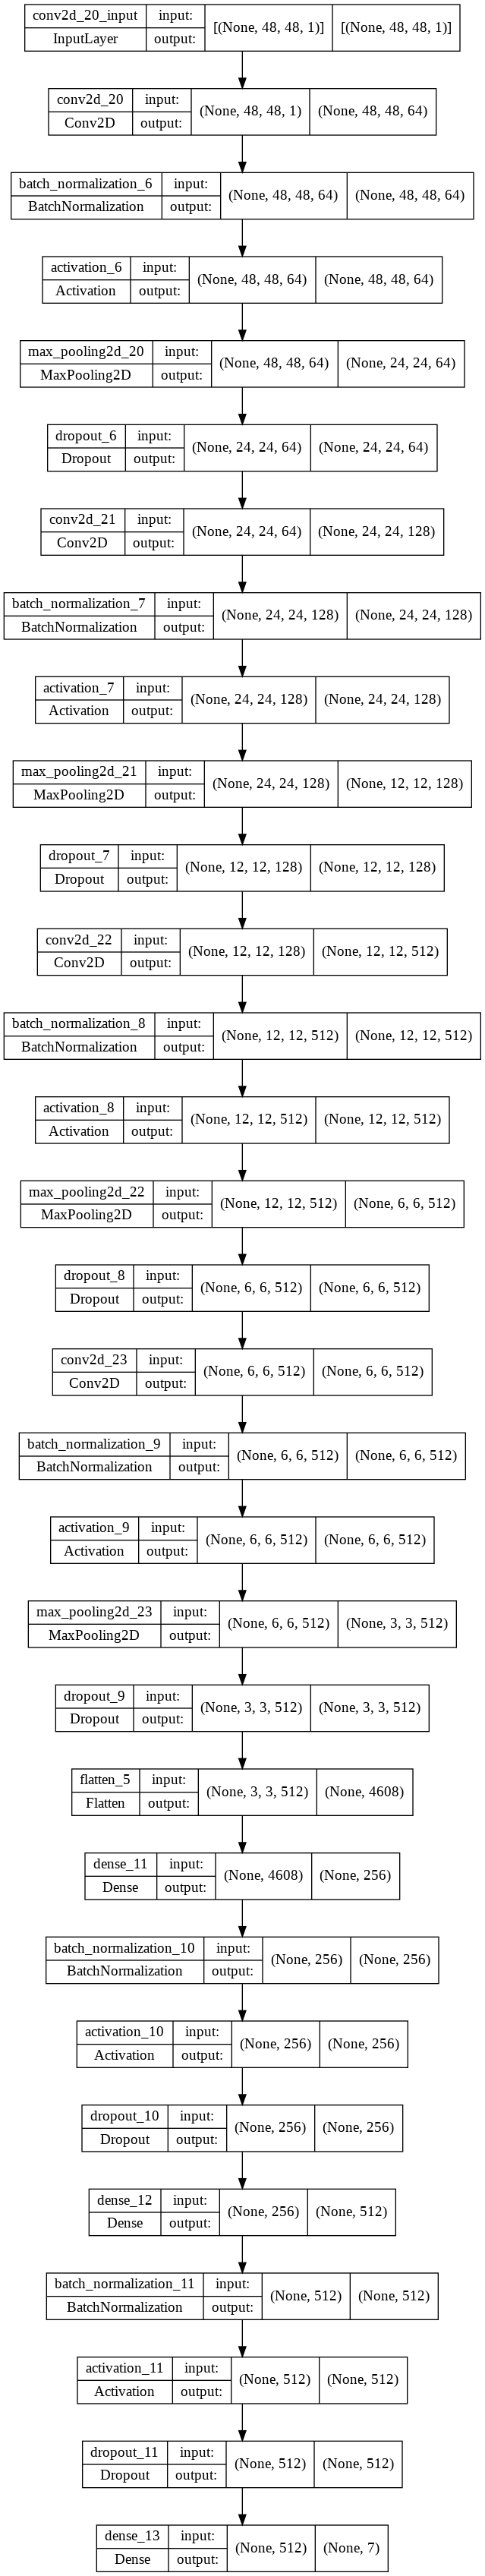

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

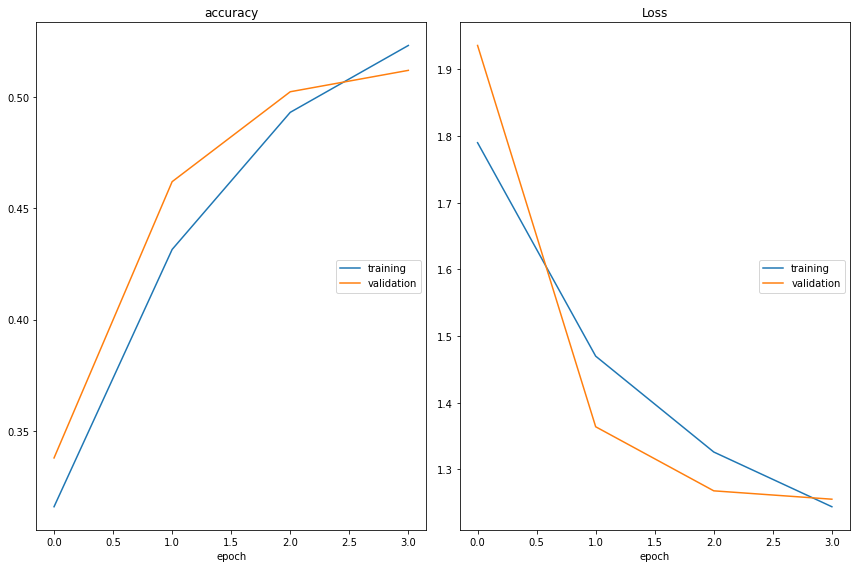

accuracy
	training         	 (min:    0.316, max:    0.523, cur:    0.523)
	validation       	 (min:    0.338, max:    0.512, cur:    0.512)
Loss
	training         	 (min:    1.244, max:    1.790, cur:    1.244)
	validation       	 (min:    1.255, max:    1.936, cur:    1.255)

Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 1490s 3s/step - loss: 1.2441 - accuracy: 0.5233 - val_loss: 1.2554 - val_accuracy: 0.5121 - lr: 5.0000e-04
Epoch 5/15
156/448 [=========>....................] - ETA: 15:23 - loss: 1.1832 - accuracy: 0.5493

In [ ]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesCallback(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

# PayGroud Start

In [ ]:
tf_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape = (48,48,1)),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        #
                                        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
                                        tf.keras.layers.MaxPool2D(2,2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(1000,activation='relu'),
                                        tf.keras.layers.Dense(7,activation = 'softmax')                          
                                        ])

In [ ]:
tf_model.summary()

In [ ]:
tf_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.0001),
                 loss = "sparse_categorical_crossentropy",
                 metrics = ['accuracy']
)

In [ ]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [ ]:
input_shape = (48, 48, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)

model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

# ML Model's 

## Scores

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

Accuracy: 99.91%


In [ ]:
obj

array([[ 59,  60,  39, ...,  72, 112, 196],
       [ 63,  49,  43, ...,  69,  97, 169],
       [ 63,  44,  36, ...,  72,  81, 137],
       ...,
       [ 20,  14,  12, ...,  54,  56,  44],
       [ 21,  16,  14, ...,  56,  55,  46],
       [ 19,  20,  10, ...,  55,  61,  40]], dtype=uint8)

In [ ]:
arr = np.array((1, 2, 3, 4, 5))

print(arr)

[1 2 3 4 5]


In [ ]:
len(np.array2string(obj))

191